# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#define path for future use
path = r'/Users/krishngarg/Downloads/Data Analytics/Data immersion /Achievement_4/06-2020 Instacart Basket Analysis'

# importing previous file

In [3]:
merged_dataset = pd.read_pickle(os.path.join(path,'02 Data','orders_products_merged_updated_2.pkl'))

In [4]:
merged_dataset.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,Busiest day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_prior_orders,order_frequency_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Least busys,Average orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Least busys,Most orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Mid-range product,Least busy,Least busys,Average orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Mid-range product,Least busy,Least busys,Most orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer


<Axes: >

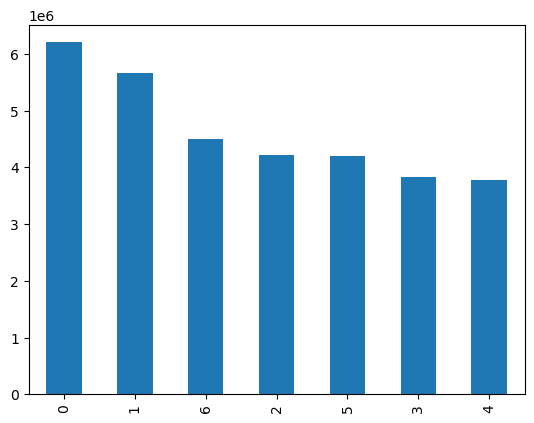

In [5]:
#create bar chart
merged_dataset['orders_day_of_week'].value_counts().plot.bar()

<Axes: >

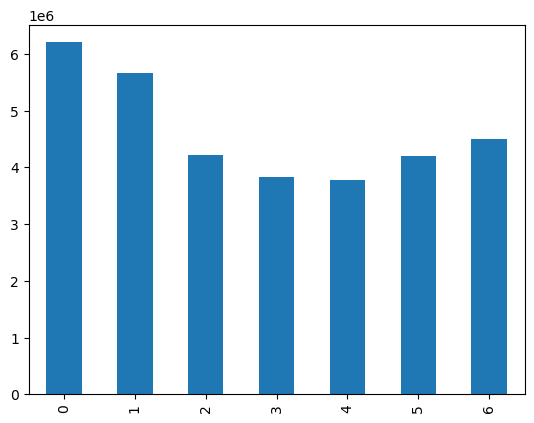

In [6]:
merged_dataset['orders_day_of_week'].value_counts().sort_index().plot.bar()

<Axes: >

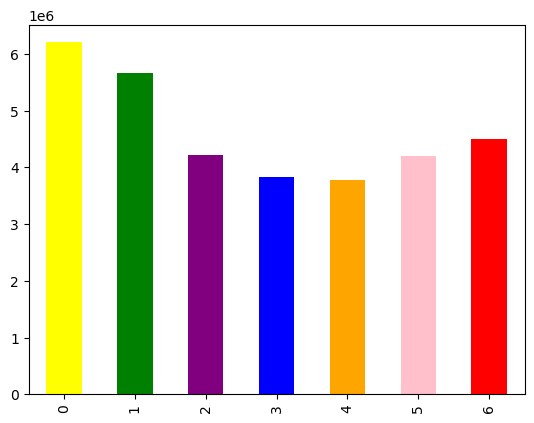

In [9]:
#add colors to the bars
merged_dataset['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['yellow','green','purple','blue','orange','pink','red'])

#  save the visualization

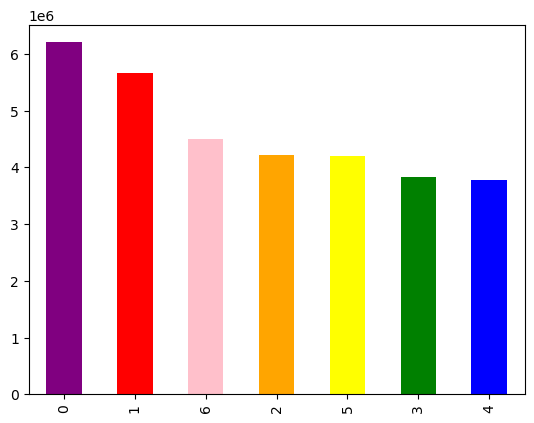

In [10]:
bar = merged_dataset['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

# Export the visualization outside of this jupyter

In [11]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

#  Creating Histogram

<Axes: ylabel='Frequency'>

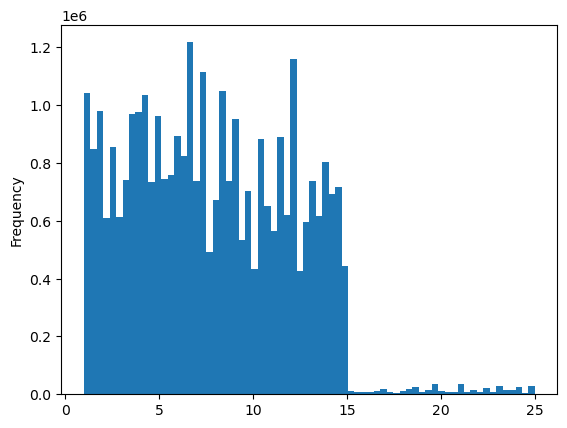

In [18]:
merged_dataset['prices'].plot.hist(bins = 70)

Observation:
most products are between $1 and $15, while a few are higher priced at $15 to $25.

In [13]:
merged_dataset['prices'].describe()

count    3.240486e+07
mean     7.790965e+00
std      4.241491e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

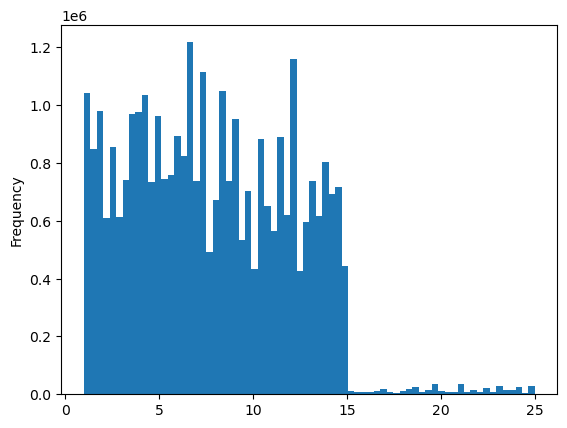

In [23]:
hist = merged_dataset['prices'].plot.hist(bins = 70)

#  Exporting histogram

In [24]:
#exporting histogam as image
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

#  Creating scatterplot

<Axes: xlabel='prices', ylabel='prices'>

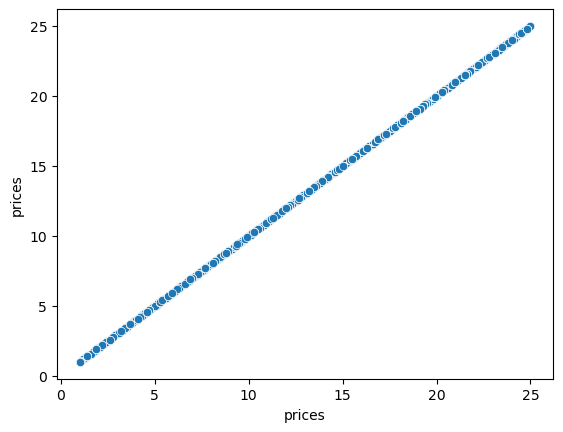

In [16]:
sns.scatterplot(x = 'prices', y = 'prices',data = merged_dataset)

# Check outlier 

In [17]:
merged_dataset.loc[merged_dataset['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,Busiest day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_prior_orders,order_frequency_flag


# Creating Line chart

This line chart will require a great deal of computing power due to the number of unique values in the “prices” column. As such, you’re likely to get a memory error and/or have your browser crash (if you have a machine with less than 16GB RAM maybe keep in mind that attempting this will cost you time to reset and start over). To avoid this, we can create subset of out dataset.

In [26]:
df = merged_dataset[:2000000]

But does this work? The answer is, well, no. That’s because this subset wouldn’t be representative of the entire population. How, then, do you tackle a problem like this? The answer is simple—sampling!


#  Sampling Data

In [27]:
# create a list holding True/False values to the test np.random.rand() <= 0.7
#np.random.seed(4)
dev = np.random.rand(len(merged_dataset)) <= 0.7

In [28]:
#Store 70% of the sample in the dataframe big
big = merged_dataset[dev]

In [30]:
#Store 70% of the sample in the dataframe big
small = merged_dataset[~dev]

In [31]:
len(merged_dataset)

32404859

In [32]:
len(big) + len(small)

32404859

#  Create new subset for two columns only: orders_day_of_week and prices

In [33]:
df_2 = small[['orders_day_of_week','prices']]

In [35]:
df_2.shape

(9720504, 2)

# Creating Line chart 

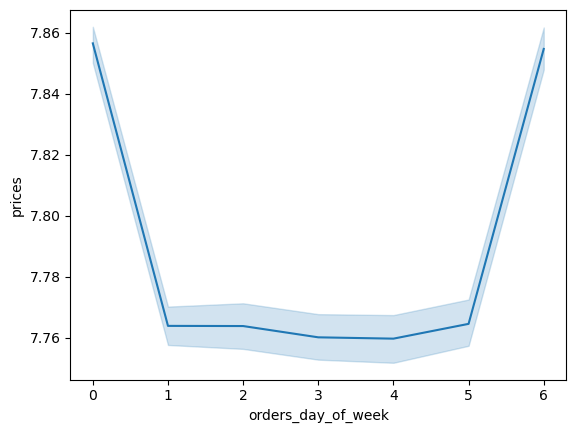

In [36]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

The peaks on days zero and six mean that most money is spent on Saturday and Sunday. This makes sense as people usually stock up on things over the weekend.

#  Export the line chart

In [37]:
#exporting line chart as image
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'linechart_prices_odw.png'))